#### MNIST data (.idx3-ubyte -> numpy array)

In [1]:
import tensorflow as tf
import numpy as np

import idx2numpy
import matplotlib.cm as cm
import matplotlib.pyplot as plt

PATH = 'C:/Projects/keras_talk/keras/intern/0709/MNIST/'
EPOCHS = 100
BATCH_SIZE = 50

x_test_path = 't10k-images.idx3-ubyte'
y_test_path = 't10k-labels.idx1-ubyte'
x_train_path = 'train-images.idx3-ubyte'
y_train_path = 'train-labels.idx1-ubyte'


x_test = idx2numpy.convert_from_file(PATH+x_test_path)
y_test = idx2numpy.convert_from_file(PATH+y_test_path)
x_train = idx2numpy.convert_from_file(PATH+x_train_path)
y_train = idx2numpy.convert_from_file(PATH+y_train_path)


x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') / 255.
y_test = tf.keras.utils.to_categorical(y_test,10)
y_train = tf.keras.utils.to_categorical(y_train,10)



#### MLP model 구성 및 학습

In [2]:

import tensorflow.keras.utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


model = tf.keras.Sequential()

Lay1 = Dense(128, activation = 'relu'    ,input_dim=28*28)
Lay2 = Dense( 64, activation = 'relu'    )
Lay3 = Dense( 32, activation = 'relu'    )
Lay4 = Dense( 10, activation = 'softmax' )

model.add(Lay1)
model.add(Lay2)
model.add(Lay3)
model.add(Lay4)


model.compile( loss='categorical_crossentropy'
              ,optimizer='sgd', metrics=['accuracy'] )

hist = model.fit( x_train, y_train, epochs=EPOCHS,
                  validation_data=(x_test, y_test), batch_size=BATCH_SIZE)

scores = model.evaluate( x_test, y_test, steps=5 )
print("{}: {:0.2f}%".format(model.metrics_names[1], scores[1]*100))




Epoch 1/100
1200/1200 [==============================] - 4s 4ms/step - loss: 0.8894 - accuracy: 0.7387 - val_loss: 0.3652 - val_accuracy: 0.8947
Epoch 2/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3206 - accuracy: 0.9071 - val_loss: 0.2722 - val_accuracy: 0.9204
Epoch 3/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2501 - accuracy: 0.9273 - val_loss: 0.2273 - val_accuracy: 0.9323
Epoch 4/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2117 - accuracy: 0.9378 - val_loss: 0.1930 - val_accuracy: 0.9435
Epoch 5/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1844 - accuracy: 0.9470 - val_loss: 0.1758 - val_accuracy: 0.9483
Epoch 6/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1640 - accuracy: 0.9523 - val_loss: 0.1649 - val_accuracy: 0.9528
Epoch 7/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1483 - accuracy: 0.9570 - val_loss: 0.1446 - val_ac

1200/1200 [==============================] - 4s 3ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0921 - val_accuracy: 0.9764
Epoch 58/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 0.0924 - val_accuracy: 0.9763
Epoch 59/100
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0064 - accuracy: 0.9995 - val_loss: 0.0930 - val_accuracy: 0.9768
Epoch 60/100
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 0.0931 - val_accuracy: 0.9759
Epoch 61/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.0956 - val_accuracy: 0.9758
Epoch 62/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 0.0943 - val_accuracy: 0.9761
Epoch 63/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0053 - accuracy: 0.9997 - val_loss: 0.0955 - val_accuracy

#### model 학습 과정 표시

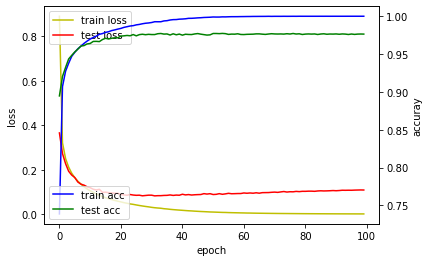

In [3]:


%matplotlib inline
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()



#### test data set 결과

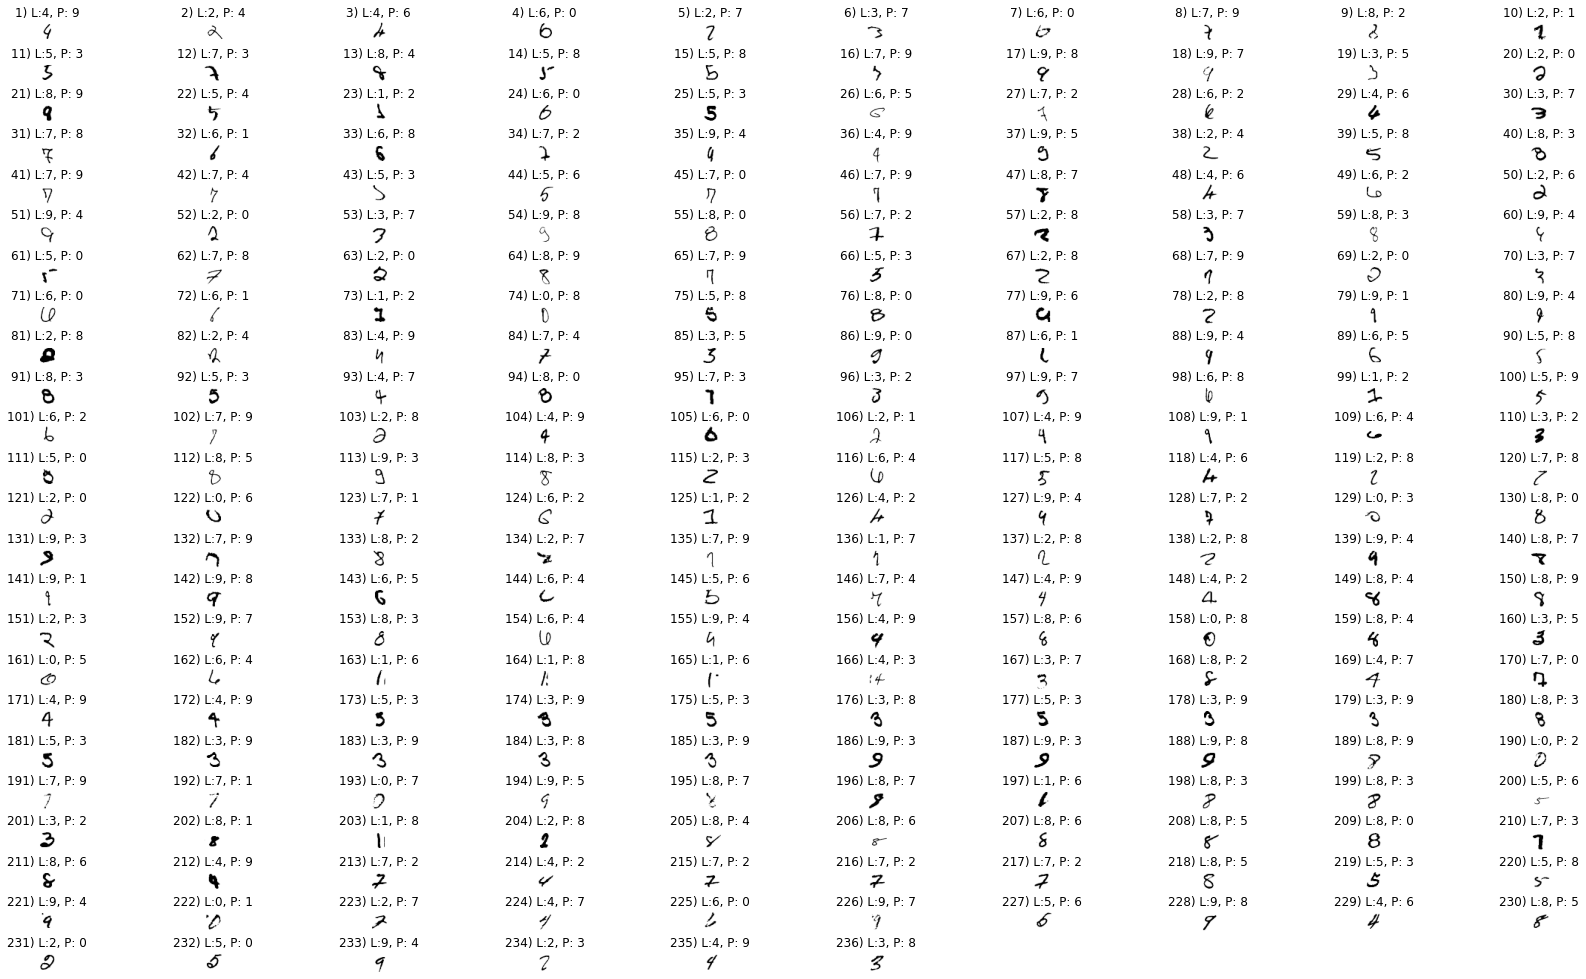

In [4]:


PREDICTED_RESULT = model.predict(x_test)
PREDICTED_LABELS = np.argmax(PREDICTED_RESULT, axis=1)
TEST_LABELS = np.argmax(y_test, axis=1)
WRONG_RESULTS = []

for n in range(len(TEST_LABELS)):
    if PREDICTED_LABELS[n] != TEST_LABELS[n]:
        WRONG_RESULTS.append(n)


plt.figure(figsize = ( len(WRONG_RESULTS)//10 +2, 10 ))
for n in range(len(WRONG_RESULTS)):
    idx = WRONG_RESULTS[n]
    plt.subplot( len(WRONG_RESULTS)//10 +2, 10, n+1)
    plt.imshow( x_test[idx].reshape(28,28), cmap='Greys' )
    tmp = str(n+1)+")"+" L:"+ str(TEST_LABELS[idx]) + ", P: "+ str(PREDICTED_LABELS[idx])
    plt.title(tmp)
    plt.axis("off")

plt.subplots_adjust(right=1, top=1.5, wspace=1, hspace=1)
plt.savefig('MNIST MLP.png', bbox_inches='tight')
plt.show()
